# 1.3)국가별 음주 데이터 분석하기

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 불러올 파일을 상대 경로로 지정.  ../는 부모 폴더
file_path = '../data/drinks.csv'
# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks = pd.read_csv(file_path)
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


<Step1. 탐색: 데이터의 기초 정보 살펴 보기>

In [2]:
# 수치형 피처의 각 컬럼별 요약 통계(갯수, 평균, 표준편차, 최솟값, 4분위수,최댓값) 지표 출력
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<Step 2. 인사이트의 발견: 탐색과 시각화하기>

[피처간의 상관관계 탐색]

[두 피처간의 상관계수 구하기]

여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하는 실습
- 상관 분석 : 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것

- 상관 계수 : 두 변수 사이의 통계적 관계를 표현하기 위해 특정한 상관 관계의 정도를 수치적으로 나타낸 계수

- 상관 계수를 구하는 것은 공분산의 개념을 포함 여러 유형의 상관계수가 존재하지만 제각기 자신들만의 정의와 특징이 있음 
- 값의 범위는 -1에서 +1 사이에 속하며 여기서 ±1은 정도가 가장 센 잠재적 일치를 나타내고 0은 정도가 가장 센 불일치를 나타냄 
- 1에 가까울 수록 서로 강한 양의 상관 관계가 있다는 것

- 피어슨 상관 계수(Pearson Correlation Coefficient ,PCC): 두 변수 X 와 Y 간의 선형 상관 관계를 계량화한 수치 스- 피어먼 상관 계수(Spearman Correlation Coefficient ,SCC):두 변수의 순위 사이의 통계적 의존성을 측정하는 비모수적인 척도

<피처간의 상관 관계를 통계적으로 탐색하는 방법>
- 단순 상관 분석 방법: 피처가 2개일 때 상관 계수를 계산하는 방법
- 다중 상관 분석 방법: 피처가 여러 개일 때 상호간의 연관성을 분석하는 방법 

In [3]:
# 맥주와 와인 소비량의 상관 관계 알아보기
#'bear_serving','wine_serving' 두 피처간의 상관관계를 계산
# 피어슨 상관계수(Pearson Correfficient,PCC): 두 변수 X와Y간의 선형 상관 관계를 계량화한 수치
# corr() 함수로 피처간의 상관 계수를 매트릭스(matrix,행렬, 숫자*기호 등을 가로, 세로로 나열)형태로 출력

# 단순 상관 분석 방법
# corr = drinks[['beer_servings','wine_servings' ]].corr(method = 'pearson')

# 다중 상관 분석 방법
#corr = drinks.corr(method = 'pearson')
corr = drinks[['beer_servings','wine_servings' ,'spirit_servings', 'total_litres_of_pure_alcohol']].corr(method = 'pearson')

corr

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.527172,0.458819,0.835839
wine_servings,0.527172,1.000000,0.194797,0.667598
spirit_servings,0.458819,0.194797,1.000000,0.654968
total_litres_of_pure_alcohol,0.835839,0.667598,0.654968,1.000000


[seaborn 시각화 라이브러리 활용]
- 히트맵(heatmap),페어플롯(pairplot) 기법 사용하기
- 히트맵(heatmap): 히트(heat)와 지도를 뜻하는 맵(map)을 결합시킨 단어로 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열분표 형태의 그래픽으로 출력

In [4]:
!pip install seaborn 

In [5]:
import seaborn as sns 

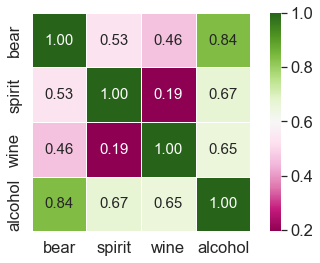

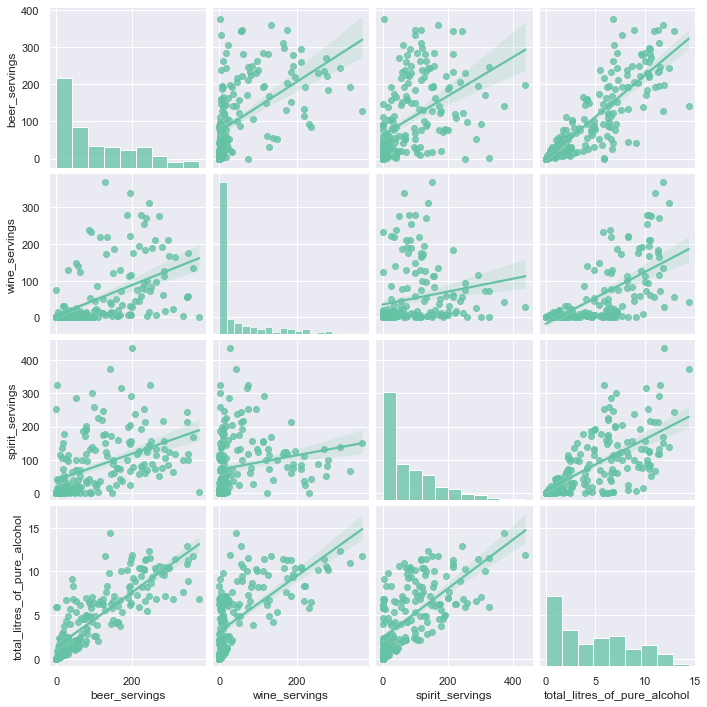

In [6]:
# corr 행렬 히트맵(heatmap)을 시각화합니다.
# 히트맵(heatmap)을 통해 corr.values 를 파라미터로 넣어줌
# 그래프 출력을 위한 cols 이름을 축약합니다.
cols_view = ['bear','spirit','wine','alcohol']

#cbar 히트맵 바 출력 여부, annot 상관 계수 출력 여부, square 사각형의 형태, fmt 소수점 자리수, 
# annot_kws 상관 계수 폰트 크기, yticklabels y 레이블명, xticklabels x 레이블명
sns.set(font_scale=1.5)


hm = sns.heatmap(
    corr.values,
    cbar = True,
    annot = True,
    square = True,
    fmt = '.2f',
    annot_kws = {'size':15},
    cmap= 'PiYG',
    linewidth = 1,
    yticklabels = cols_view,
    xticklabels = cols_view,
)

plt.tight_layout()
plt.show()

# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력
# 페어플롯(pairplot)은 데이터 프레임을 파타미터로 넣어 줌

# style : darkgrid, whitegrid, dark, white, ticks, 이미지의 전반적인 모양을 스타일링, 5가지 스타일 지원
# context : notebook, paper, talk, poster,  어떤 상황에서 보여줄 것인가에 따라 4종류의 텍스트 스케일 지원

sns.set(style='darkgrid', context = 'notebook', palette = 'Set2')

# sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
#                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
# kind="hist", kind="kde"
# corner=True, Set corner=True to plot only the lower triangle:
sns.pairplot(drinks[['beer_servings','wine_servings' ,'spirit_servings', 'total_litres_of_pure_alcohol']], height = 2.5,kind='reg')

plt.show()

1.인사이트 도출: 대륙별 wine_servings 탐색

In [7]:
wine_mean = drinks.groupby('continent')['wine_servings'].mean()

wine_mean

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

2.인사이트 도출: 전체 평균보다 적은 알코올을 섭취하는 대륙

In [9]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_few_mean = continent_mean[continent_mean <= total_mean]

continent_few_mean

continent
AF    3.007547
AS    2.170455
OC    3.381250
Name: total_litres_of_pure_alcohol, dtype: float64